<a href="https://colab.research.google.com/github/valentina1995/TrabajoGrado/blob/master/Librosa_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
from __future__ import print_function
import librosa
import scipy
import librosa.display , librosa.core
import numpy as np    
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
librosa.__version__

'0.6.3'


# LEER EL AUDIO


In [178]:
#ejemplo de audio
filename = "/content/drive/My Drive/Trabajo de Grado/audios/Escala 1 ocatava.wav"
filename2 = "/content/drive/My Drive/Trabajo de Grado/audios/Ejercicio tres notas.wav"
#Lo carga y lo convierte en un array numpy 'y', el 'sr' es la frecuencia de muestreo por segundo.
y, sr = librosa.load(filename2, mono = True)
t = librosa.get_duration(y, sr)
print(t) #in seconds
print(y.shape)
print(sr)

15.625034013605442
(344532,)
22050


In [179]:
import IPython.display as ipd
ipd.Audio(filename2)

# visualización de la señal


                    

Text(0.5, 1.0, 'Monophonic')

<Figure size 432x288 with 0 Axes>

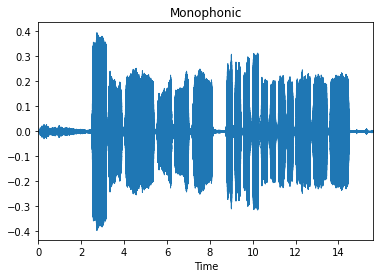

In [180]:
#señal de onda del audio 
plt.clf()
plt.figure()
librosa.display.waveplot(y= y, sr = sr)
plt.title('Monophonic')


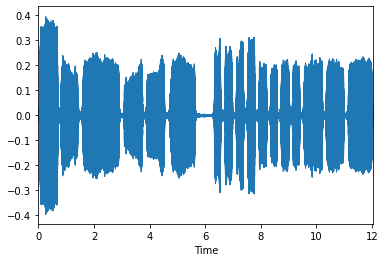

In [181]:
#Recorta el silencio de entrada y salida de una señal de audio.
sig = librosa.effects.trim(y,top_db= 23)
yt = sig[0]
plt.figure()
librosa.display.waveplot(sig[0],sr)
plt.show()

# Segmentation
En la música, la tarea de segmentación consiste en descomponer un determinado flujo de audio en secciones acústicamente significativas, cada una de las cuales corresponde a un intervalo de tiempo continuo especificado por un límite de inicio y fin. A un nivel fino, la segmentación puede tener como objetivo encontrar los límites entre las notas individuales o encontrar los intervalos de tiempo especificados por las posiciones de los tiempos.


**PEAK PICKING**


---
Ésta función localiza los picos de una señal. Estos picos corresponden a los inicios musicales.
P.D: Ejercicio de muestra de los creadores de libreria.
Un aumento en la envoltura de la amplitud de la señal denotará un candidato de inicio.



FUNCIONA PARA LA ESCALAS PERO NO PARA LOS EJERCICIOS.

[  1024  16384  33280  65536  83456 103936 138240 145920 155136 164352
 174592 183808 192512 200192 210432 227840 245760 265728]
[ 0.04643991  0.74303855  1.50929705  2.9721542   3.78485261  4.71365079
  6.26938776  6.61768707  7.03564626  7.45360544  7.91800454  8.33596372
  8.73070295  9.07900227  9.54340136 10.33287982 11.14557823 12.05115646]


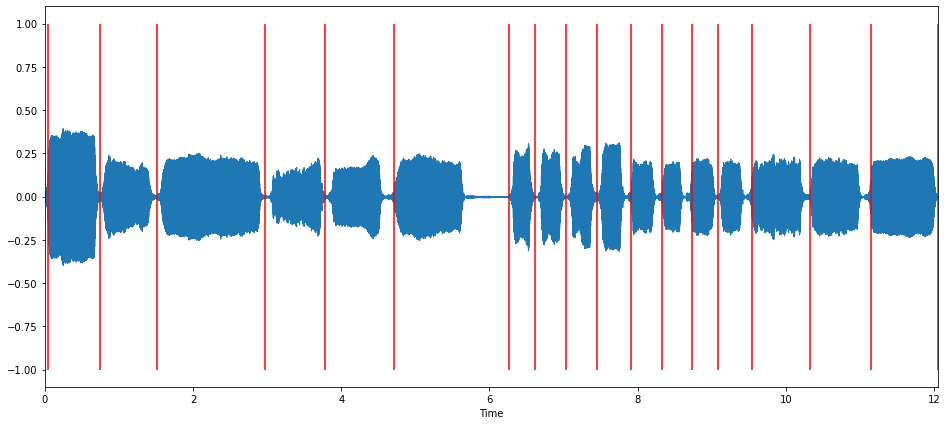

In [182]:
#COMPUTE AN ONSET ENVELOPE
hop_length = 512

onset_frames = librosa.onset.onset_detect(yt,sr, hop_length=hop_length, 
                                           backtrack=True, #Si es TRUE los eventos de inicio detectados son retrocedido al mpinimo de energía precedente más cercano. Util para realizar el corte de segmentación.
                                           pre_max = 7,
                                           post_max= 7,
                                           pre_avg= 7,
                                           post_avg= 7,
                                           delta= 0.2,
                                           wait = 0
                                          
                                           ) 
onset_samples = librosa.frames_to_samples(onset_frames)
onset_boundaries = np.concatenate([onset_frames, [len(yt)]]) #Agrego el inicio y el final de la señal. 
print (onset_boundaries)

times = librosa.samples_to_time(onset_boundaries, sr=sr) #Convierte los inicios a sus respectivas unidades en segundos
print( times)
plt.figure(figsize=(16,7))
librosa.display.waveplot(yt, sr=sr)
plt.vlines(times, -1, 1, color='r')

In [0]:
onset_times   #Empieza cada nota de la señal pero en segundos
t = []
for i in range(0,len(onset_times)-1):
  time = librosa.samples_to_time(yt,sr)
  print(time)
  print(onset_times[i])

  t.append(onset_times[i])
plt.figure()
plt.plot(t)


# Separar la señal 




In [0]:
# la señal es y
def divSignal(signal, peaks):
  senal = []
  for i in range(0,len(peaks)-1):
    
      x = signal[slice(peaks[i],peaks[i+1])]
      senal.append(x)
  return senal


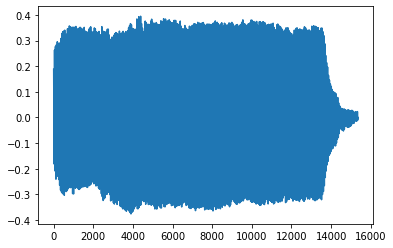

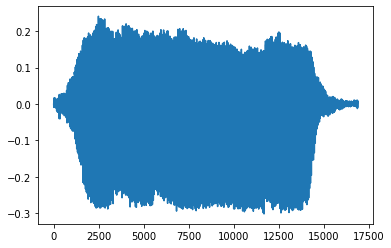

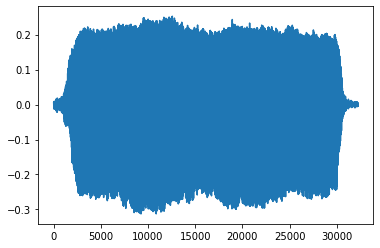

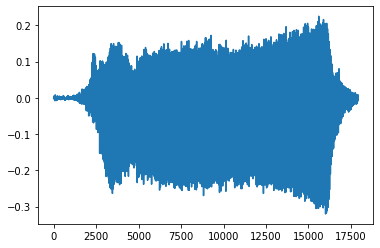

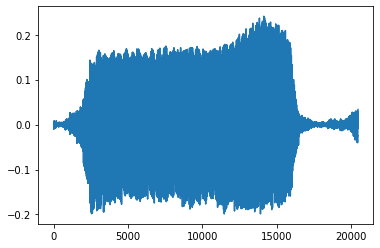

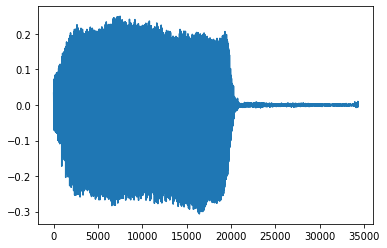

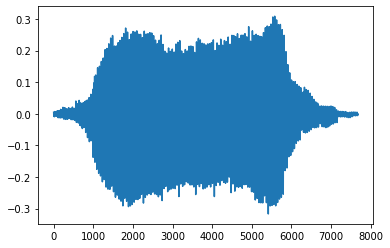

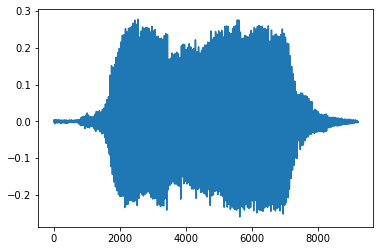

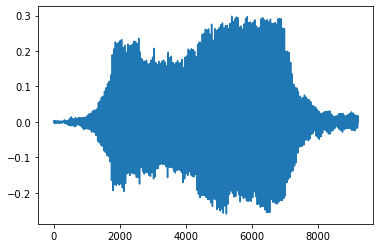

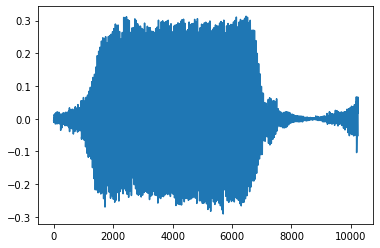

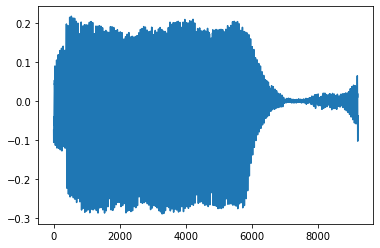

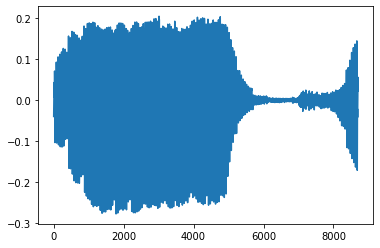

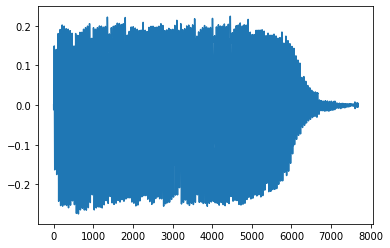

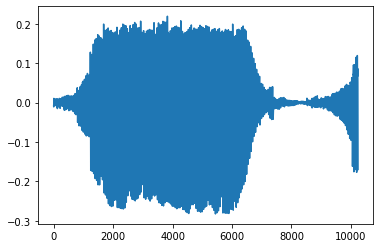

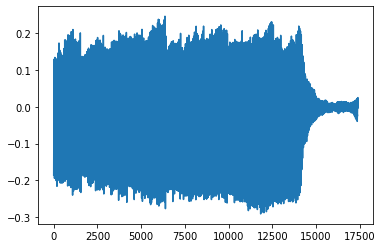

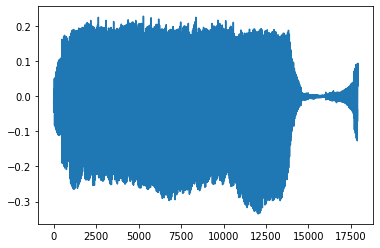

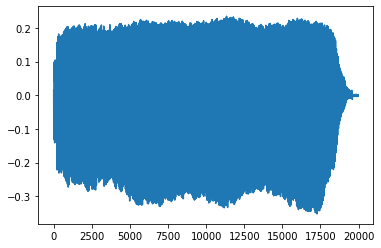

In [186]:
senal = divSignal(yt,onset_boundaries)
for i, x in enumerate(senal):
  plt.figure()
  plt.plot(senal[i])

#Determinar duración del sonido 


##duración de cada señal individual

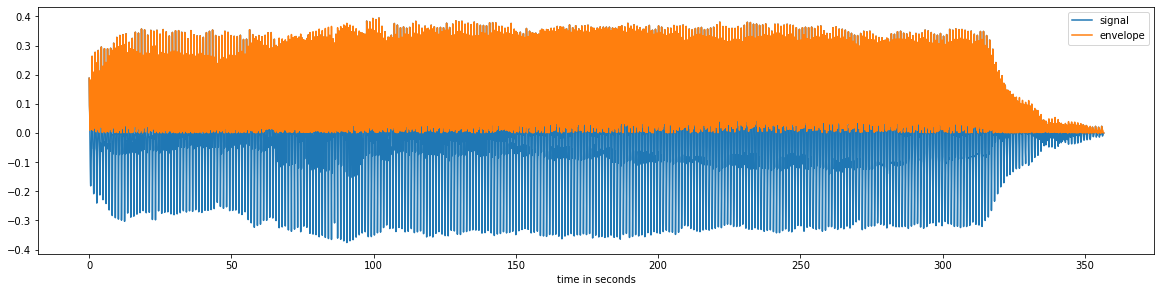

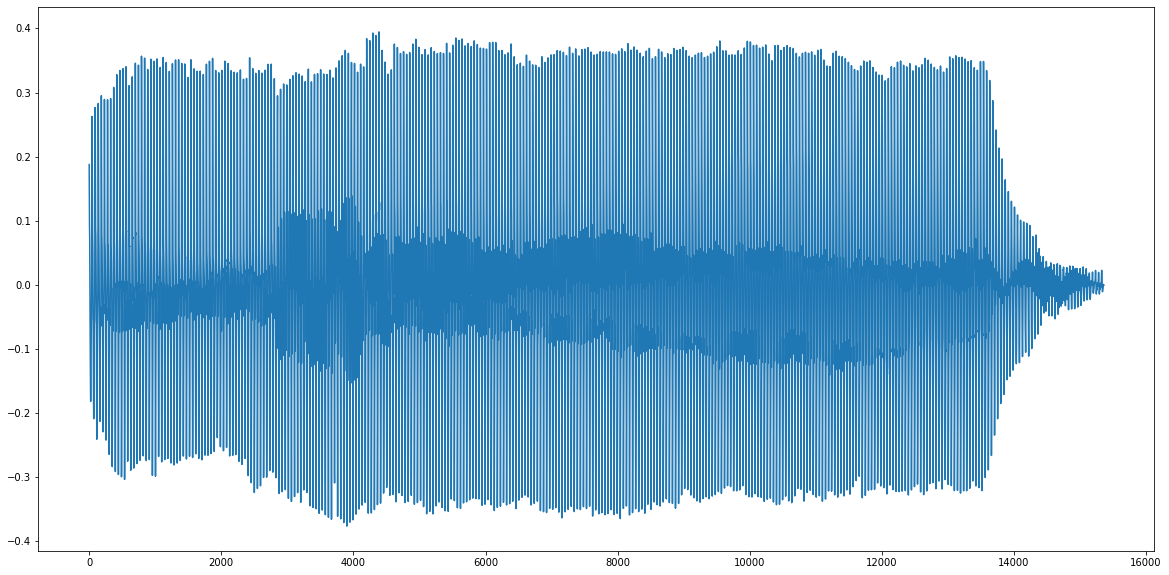

In [222]:

t0 = librosa.times_like(senal[0], sr)

analytic_signal = hilbert(senal[0])
amplitude_envelope = np.abs(analytic_signal.real)

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(211)
ax0.plot(t0, senal[0], label='signal')
ax0.plot(t0, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

plt.figure(figsize=(20,10))
plt.plot(senal[0])

(0.0, 120.0)

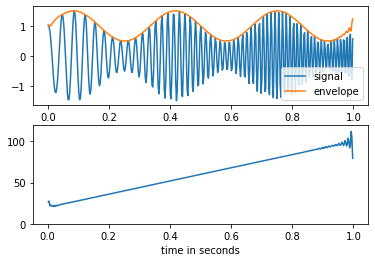

In [210]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )


analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs)



fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)


# DETERMINAR FRECUENCIA



##FFT


In [0]:
def estimate_pitch_fft(segment, sr):
  # Compute a fft of input segment.
  L = len(segment)
  w = int(np.floor(L/2))-1 
  frec = np.linspace (0,1,L)*sr
  S=np.abs(np.fft.fft(senal[1])/L)[:w]
  f=frec*np.fft.fftfreq(L)
  #Escogo el pico más alto
  freq = f[S.argmax()]
  print(freq)
  freq = sr/freq
  print(freq)
  return freq

(16896,)
(8447,)
16896


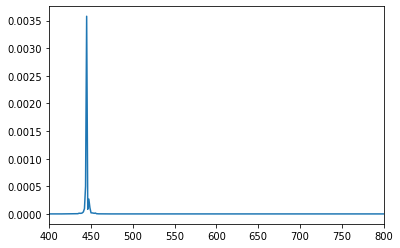

8.982045584862385


In [189]:
L = len(senal[1])
w = int(np.floor(L/2))-1
frec = np.linspace (0,1,L)*sr
S=np.abs(np.fft.fft(senal[1])/L)[:w]**2
f=frec*np.fft.fftfreq(L) 

frecuencia = f[S.argmax()]
print(frec.shape)
print(S.shape)
plt.figure()
plt.plot(frec[:w],S)
print(L)
plt.xlim([400,800])
plt.show()
print(frecuencia)

In [190]:
frec = estimate_pitch_fft(senal[1],sr)
nota = librosa.hz_to_note(frec)
print("la nota es {}".format(nota) )
print("la frec es {}".format(frec) )

8.982045584862385
2454.8973607038124
la nota es D#7
la frec es 2454.8973607038124


In [191]:
for j in range(0,len(senal)):
  frec = estimate_pitch_fft(senal[j],sr)
  nota = librosa.hz_to_note(frec)
  print("la nota es {}".format(nota) )
  print("la frec es {}".format(frec) )

10.86833948641676
2028.8287854421615
la nota es B6
la frec es 2028.8287854421615
8.982045584862385
2454.8973607038124
la nota es D#7
la frec es 2454.8973607038124
2.4643920273988527
8947.440080494665
la nota es C#9
la frec es 8947.440080494665
7.984828211325967
2761.4870873143504
la nota es F7
la frec es 2761.4870873143504
6.113341453630855
3606.865438033728
la nota es A7
la frec es 3606.865438033728
2.178915984092706
10119.710975997798
la nota es D#9
la frec es 10119.710975997798
43.47618861098451
507.17417290872964
la nota es B4
la frec es 507.17417290872964
30.191142371473138
730.34666024544
la nota es F#5
la frec es 730.34666024544
30.191142371473138
730.34666024544
la nota es F#5
la frec es 730.34666024544
24.454559943140204
901.672328239351
la nota es A5
la frec es 901.672328239351
30.191142371473138
730.34666024544
la nota es F#5
la frec es 730.34666024544
33.84772516006144
651.4470291793157
la nota es E5
la frec es 651.4470291793157
43.47618861098451
507.17417290872964
la nota 

(1025, 34)


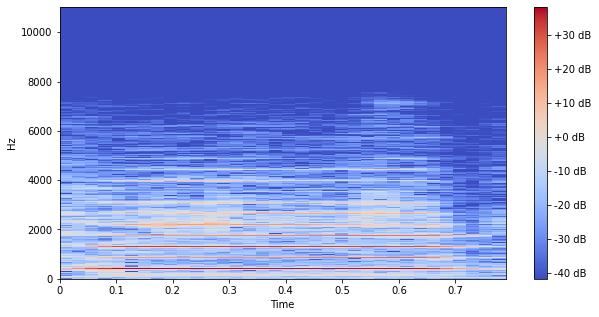

In [192]:
#Display a spectogram 
Y = librosa.stft(senal[1])
#Un espectograma muestra la intensidad de las frecuencias a lo largo del tiempo.
print(Y.shape)
n_fft = 2048      # Tamaño de la ventana
hop_length = 512  # Solape
#Convierte un espectrograma de amplitud en un espectrograma a escala de dB.
Xdb = librosa.amplitude_to_db(abs(Y))  #resultado es una matriz
#Para dar tamaño
plt.figure(figsize=(10, 5))
#librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
librosa.display.specshow(Xdb, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
#Para la barra de convenciones
plt.colorbar(format='%+2.0f dB')


In [193]:
X_mag.shape

NameError: ignored

In [0]:
#Calcular en centroide espectral
cent = librosa.feature.spectral_centroid(y= y, sr= sr)
#from spectogram
S, phase = librosa.magphase(librosa.stft(y=y))
frecuencia = np.linspace (0,1,len(y))*sr
S2=np.abs(np.fft.fft(y))/len(y)
plt.figure()
plt.plot(frecuencia, S2)
plt.show()
cent2 = librosa.feature.spectral_centroid(S=S)
#cent y cent2 son los mismo arrays, son muchisimos datos?
plt.figure(figsize=(14, 5))
plt.hist(cent, 20)
plt.show()
print(cent.shape)

In [0]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi  #por que divide las muestras entre la frecuencia
t_hi = sr/f_lo
print(f_lo, f_hi)
print(t_lo, t_hi)
r[:int(t_lo)] = 0
r[int(t_hi):] = 0
plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

In [0]:
for i in range(0,len(senal)-1) :
  cent = librosa.feature.spectral_centroid(y= senal[i])
  #print(i)
  nota_frec = np.amax(cent)
  #print(nota_frec)
  nota_anglo = librosa.hz_to_note(nota_frec)
  #print(nota_anglo)
#calcula el centroide espectral para cada cuadro de una señal:

bins_per_octave = 36
cqt = librosa.cqt(senal[1], sr=sr, n_bins=300, bins_per_octave=bins_per_octave)
log_cqt = librosa.amplitude_to_db(cqt)
plt.figure(figsize=(15, 5))
librosa.display.specshow(log_cqt, sr=sr, x_axis='time', y_axis='cqt_note', bins_per_octave=bins_per_octave)
chroma_cq = librosa.feature.chroma_cqt(y=senal[1], sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
print(chroma_cq.shape)

In [0]:
for i in range(0,len(senal)):
  plt.figure(figsize=(15, 6))
  plt.subplot(3, 1, 1)
  librosa.display.waveplot(senal[i], sr = sr)


**CON LA TRANSFORMADA ESPECTRAL Q- CONSTANTE (CQT)**

In [0]:
bins_per_octave = 36 # A mayor cantidad de bins se mejora la resolucón en frecuencia a costo
cqt = librosa.cqt(y, sr=sr, n_bins=300, bins_per_octave=bins_per_octave)
log_cqt = librosa.amplitude_to_db(cqt) #
cqt.shape
print(log_cqt.shape)

In [0]:
librosa.display.specshow(log_cqt, sr=sr, x_axis='time', y_axis='cqt_note', bins_per_octave=bins_per_octave)

In [0]:
S = np.abs(librosa.stft(y))
n_fft = 2048      # Tamaño de la ventana
hop_length = 512  # Solape
pitches, magnitudes = librosa.piptrack(S=S, sr=sr, n_fft=n_fft, hop_length= hop_length)
#No funciona

El STFT representa una señal en el dominio del tiempo y la frecuencia al computar transformadas discretas de Fourier (DFT) sobre ventanas cortas superpuestas.

Esta función devuelve una matriz de valor complejo D tal que

np.abs(D[f, t]) es la magnitud del binomio de frecuencias f en la trama t, y
np.angle(D[f, t]) es la fase del binomio de frecuencias f en el cuadro t.
Los números enteros t y f pueden convertirse en unidades físicas mediante las funciones de utilidad frames_to_sample y fft_frequencies.


In [0]:
#Display a spectogram 
Y = librosa.stft(y)
#Un espectograma muestra la intensidad de las frecuencias a lo largo del tiempo.
print(Y.shape)
n_fft = 2048      # Tamaño de la ventana
hop_length = 512  # Solape
#Convierte un espectrograma de amplitud en un espectrograma a escala de dB.
Xdb = librosa.amplitude_to_db(abs(Y))  #resultado es una matriz
#Para dar tamaño
plt.figure(figsize=(20, 10))
vectorfrec=librosa.display.specshow(Xdb, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
#Para la barra de convenciones
plt.colorbar(format='%+2.0f dB')

In [0]:
Xdb.shape

Tiene 1025 contenedores de frecuencia y 707 cuadros de tiempo

**CHROMA FEATURE EXTRACTION**
La característica del croma es un descriptor, que representa el contenido tonal de una señal de audio musical en forma condensada. Por lo tanto, los rasgos 
cromáticos pueden considerarse como un requisito importante para el análisis semántico de alto nivel, como el reconocimiento de acordes o la estimación de similitudes armónicas. Una mejor calidad de la característica cromática extraída permite obtener resultados mucho mejores en estas tareas de alto nivel. Para la extracción de los rasgos cromáticos se utilizan transformadas de Fourier de corto tiempo y transformadas de Q constante.

In [0]:
chromagram = librosa.feature.chroma_stft(yt, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
print(chromagram)
print(chromagram.shape)
chroma = librosa.frames_to_samples(chromagram)
chroma

In [0]:
librosa.tempo_frequencies(sr)
#Crear una matriz de banco de filtros para convertir el STFT en croma
chromafb = librosa.filters.chroma(sr, n_fft=n_fft)

librosa.display.specshow(chromafb, x_axis='linear')
plt.ylabel('Chroma filter')
plt.title('Chroma filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()